In [14]:
# we first load all the libraries we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [15]:
wine = datasets.load_wine() # we load the dataset
wine.keys() # and check the keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [16]:
# we can also print the description of the dataset
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Let's get a panoramic view of the dataset, we will check how many variables and rows we have.

In [17]:
# we save the data and the keys in different variables
X = wine["data"] # this contains the features of the dataset
Y = wine["target"] # this contains the labels, which represent the type of wine

# we find how many rows we have. We verify that we have the same numbers of rows, ensuring that each wine sample has a label
print("Number of rows in data:", np.shape(X)[0])
print("Number of rows in target", np.shape(Y)[0])

# we find the number of columns
print("Number of columns in dataset:", np.shape(X)[1])

# and we find the name of the columns
col_names = wine["feature_names"]
print("Quantity of columns with name:"), len(col_names)
print("Names of the columns", col_names)

Number of rows in data: 178
Number of rows in target 178
Number of columns in dataset: 13
Quantity of columns with name:
Names of the columns ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Now that we now everything seems in order (no columns without names, no wines without label), let get a snipset of the data

In [18]:
# we use pandas to get a nice data frame
# we design the columns and the rows
df_wine = pd.concat([pd.DataFrame(data=X, columns=col_names),
                    pd.DataFrame(data=Y, columns=["wine_class"])], axis="columns")

#we print it all in a table
print("Number of files:", df_wine.shape[0], "\n" "Number of columns:", df_wine.shape[1])
df_wine.head(5)

Number of files: 178 
Number of columns: 14


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


The next step is to check for null values. But in this case, we will find none.

In [19]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_class                      0
dtype: int64

We are going to do now a basic stadistic analysis

In [20]:
# we first check the type of the variables
print(df_wine.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
wine_class                        int32
dtype: object


Every variable is float but wine_class which is the categorical variable that details the wine class and only has values from 0 to 2.
We can do a simple bar plot to see how many wines are in each class.

wine_class
1    71
0    59
2    48
Name: count, dtype: int64


Text(0, 0.5, 'Count')

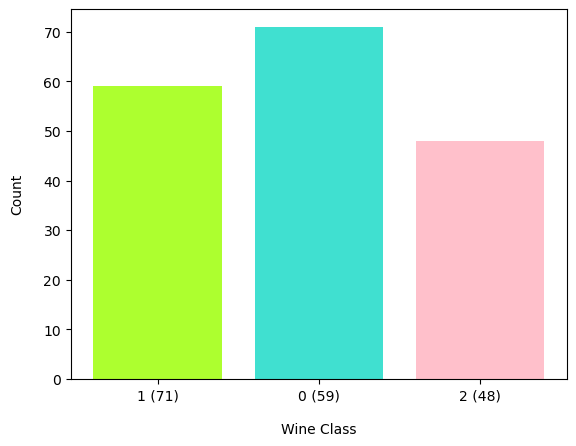

In [21]:
# we show the frequency of each variable
print(df_wine["wine_class"].value_counts())

# we make a bar diagram
# defining the columns
labels = [df_wine["wine_class"].value_counts()[0],
            df_wine["wine_class"].value_counts()[1],
            df_wine["wine_class"].value_counts()[2]]
values = np.arange(len(labels))

# and the plot
plt.bar(values, labels, color = ("greenyellow", "turquoise", "pink"))

# and we design the axis
plt.xticks(values, ('1 ('+str(df_wine["wine_class"].value_counts()[1])+')',
                   '0 ('+str(df_wine["wine_class"].value_counts()[0])+')',
                   '2 ('+str(df_wine["wine_class"].value_counts()[2])+')'))
plt.xlabel("Wine Class", labelpad=14)
plt.ylabel("Count", labelpad=14)

In [22]:
# we can also obtain some descriptive staditical data for the int variables
table_intVariables = df_wine.describe().T 
table_intVariables

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


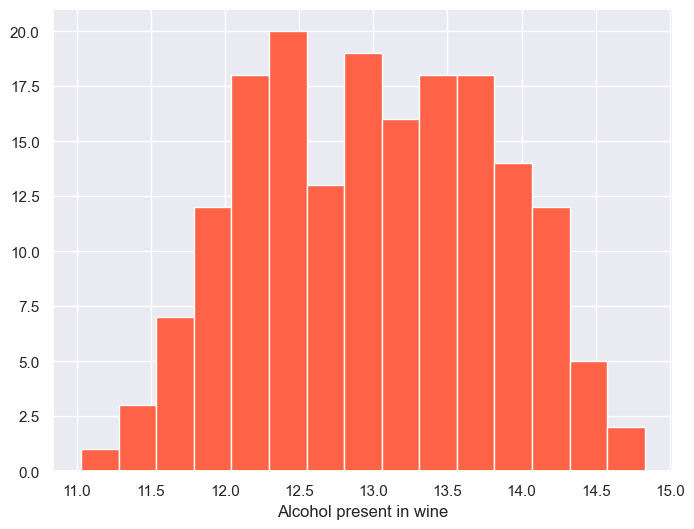

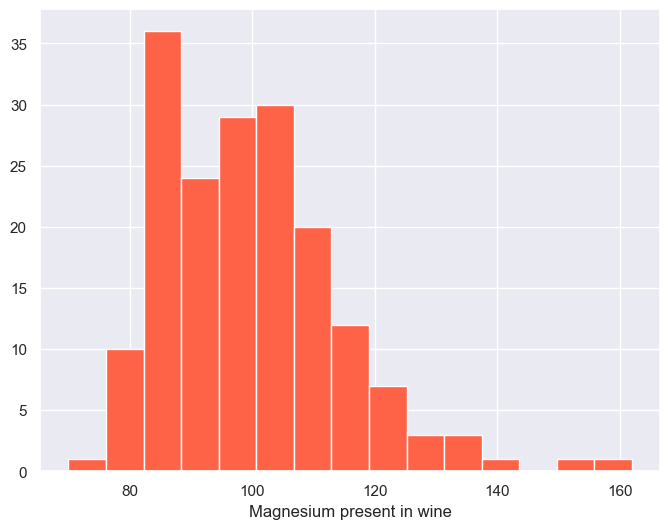

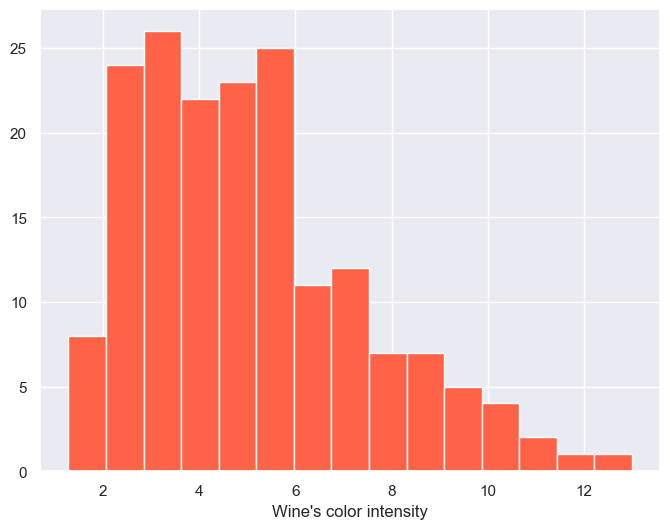

In [23]:
# we design a histogram vor the variables alcohol, magnesium, and color intensity

# alcohol
sns.set(rc={'figure.figsize':(8,6)})
plt.hist(df_wine['alcohol'], color = "tomato", bins = 15)
plt.xlabel("Alcohol present in wine")
plt.show()

# magnesium
plt.hist(df_wine['magnesium'], color = "tomato", bins = 15)
plt.xlabel("Magnesium present in wine")
plt.show()

# color intensity
plt.hist(df_wine['color_intensity'], color = "tomato", bins = 15)
plt.xlabel("Wine's color intensity")
plt.show()
